# CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
import tensorflow as tf

In [2]:
tf.random.set_seed(42)

# Load

In [3]:
dataset = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    class_names=['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut'],
    image_size=(228,228), shuffle=True, seed=42, batch_size=40
)

Found 120 files belonging to 3 classes.


In [6]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1/255.
)
train_images = datagen.flow_from_directory(
    'AugmentedData',
    target_size=(228, 228),
    batch_size=100
)

Found 1082 images belonging to 3 classes.


# Model

In [7]:
vaidation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1/255.
)
validation_images = datagen.flow_from_directory(
    'data',
    target_size=(228, 228),
)

Found 120 images belonging to 3 classes.


In [8]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same',
                           activation='relu', input_shape=(228, 228, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [9]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
cnn.fit(
    train_images,
    epochs=30,
    verbose=2,
    validation_data= validation_images
)

Epoch 1/30
11/11 - 36s - loss: 1.3674 - accuracy: 0.3909 - val_loss: 1.0277 - val_accuracy: 0.4167 - 36s/epoch - 3s/step
Epoch 2/30
11/11 - 30s - loss: 0.9569 - accuracy: 0.5444 - val_loss: 0.7399 - val_accuracy: 0.6333 - 30s/epoch - 3s/step
Epoch 3/30
11/11 - 29s - loss: 0.8055 - accuracy: 0.6562 - val_loss: 0.6219 - val_accuracy: 0.7833 - 29s/epoch - 3s/step
Epoch 4/30
11/11 - 30s - loss: 0.6784 - accuracy: 0.7098 - val_loss: 0.4440 - val_accuracy: 0.8667 - 30s/epoch - 3s/step
Epoch 5/30
11/11 - 30s - loss: 0.5388 - accuracy: 0.7791 - val_loss: 0.2883 - val_accuracy: 0.9250 - 30s/epoch - 3s/step
Epoch 6/30
11/11 - 30s - loss: 0.4430 - accuracy: 0.8383 - val_loss: 0.2232 - val_accuracy: 0.9250 - 30s/epoch - 3s/step
Epoch 7/30
11/11 - 29s - loss: 0.3829 - accuracy: 0.8392 - val_loss: 0.1697 - val_accuracy: 0.9583 - 29s/epoch - 3s/step
Epoch 8/30
11/11 - 30s - loss: 0.3034 - accuracy: 0.8817 - val_loss: 0.1339 - val_accuracy: 0.9583 - 30s/epoch - 3s/step
Epoch 9/30
11/11 - 29s - loss: 0

In [22]:
hist = pd.DataFrame(cnn.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,1.367411,0.390943,1.027697,0.416667
1,0.956900,0.544362,0.739903,0.633333
2,0.805472,0.656192,0.621944,0.783333
3,0.678367,0.709797,0.444049,0.866667
4,0.538815,0.779113,0.288308,0.925000
5,0.443007,0.838262,0.223165,0.925000
6,0.382935,0.839187,0.169664,0.958333
7,0.303352,0.881701,0.133916,0.958333
8,0.237235,0.912200,0.154595,0.966667
9,0.168790,0.943623,0.115956,0.966667


In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 228, 228, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 114, 114, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [13]:
cnn.save('CNN16_32_64_128_3_100Images')

INFO:tensorflow:Assets written to: CNN16_32_64_128_3_100Images\assets


In [14]:
model = tf.keras.models.load_model('CNN16_32_64_128_3')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 228, 228, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 114, 114, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 114, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [15]:
datagen_test = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale= 1/255.
)
test_datagen = datagen.flow_from_directory(
    'data',
    target_size=(228, 228),
    batch_size=60
)

Found 120 images belonging to 3 classes.


In [16]:
test_images, test_labels = next(iter(test_datagen))

In [17]:
model.evaluate(test_images, test_labels)

2/2 [==============================] - 1s 209ms/step - loss: 0.0585 - accuracy: 0.9667


[0.05852450802922249, 0.9666666388511658]

In [18]:
model.predict(test_images)

array([[9.9999797e-01, 1.1052759e-09, 2.0498733e-06],
       [3.5837475e-05, 1.4768536e-04, 9.9981648e-01],
       [4.2099422e-01, 5.4150146e-01, 3.7504334e-02],
       [5.3402158e-03, 9.9029875e-01, 4.3610078e-03],
       [3.6937673e-02, 8.9905256e-01, 6.4009808e-02],
       [1.6755598e-04, 9.2851353e-01, 7.1318895e-02],
       [5.7373950e-03, 7.4883354e-01, 2.4542898e-01],
       [2.2285631e-05, 2.8684332e-07, 9.9997747e-01],
       [1.8323010e-03, 9.9550253e-01, 2.6651791e-03],
       [3.9635159e-02, 1.1098178e-02, 9.4926667e-01],
       [9.9970728e-01, 7.5138989e-05, 2.1765755e-04],
       [9.9902821e-01, 3.1357369e-05, 9.4047788e-04],
       [9.8763984e-01, 1.6972242e-04, 1.2190328e-02],
       [1.0655771e-04, 2.4144003e-07, 9.9989319e-01],
       [8.6772032e-03, 5.0539835e-03, 9.8626882e-01],
       [9.6073600e-11, 2.1366648e-09, 1.0000000e+00],
       [4.5284224e-08, 9.9982435e-01, 1.7562966e-04],
       [9.9973041e-01, 4.0110262e-07, 2.6923433e-04],
       [6.1179325e-04, 6.792

In [19]:
test_images.shape

(60, 228, 228, 3)

## Visualization

In [20]:

def plotNN(model):
    history = pd.DataFrame(model.history.history)
    plt.figure(figsize=(18, 10))
    plt.plot(history.index.values, history['loss'], label='Training Error', color='darkorange', linewidth=3)
    plt.plot(history.index.values, history['val_loss'], label='Validation Error', color='lightgreen', linewidth=3)
    plt.legend()
    plt.grid(True)
    plt.show()

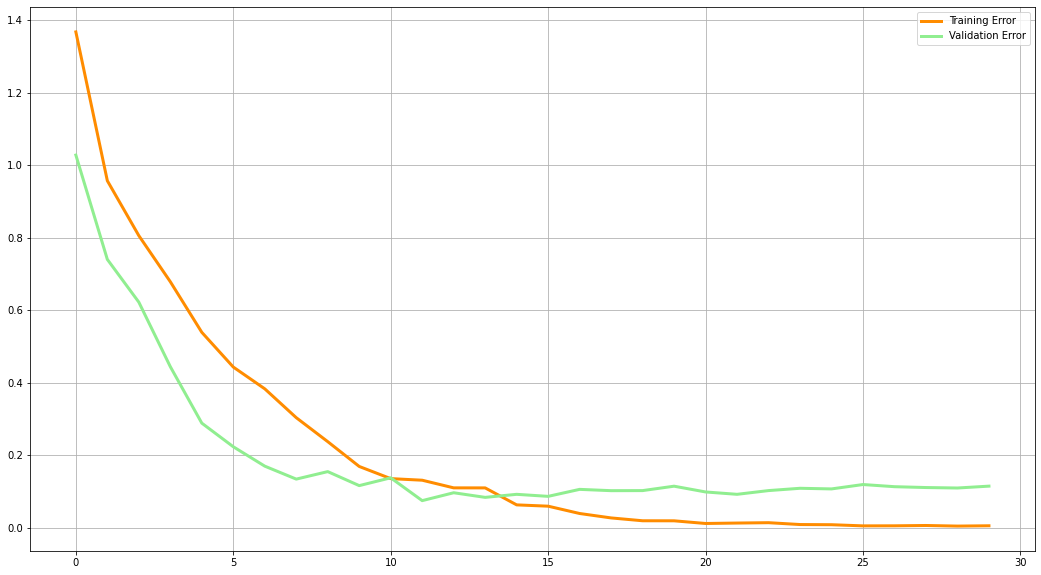

In [21]:
plotNN(cnn)